# TEMPLATE 1 - PREPROCESSING

# Libraries

In [170]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
#from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns',100) 
pd.set_option('display.max_rows',100)  # para visualizar mas columnas y filas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Import data

Importo el csv de Train test y el de la explicaciones de las varibales y los cargos como dataframe

In [171]:
df = pd.read_csv(r'telecom_churn_TRAINTEST.csv')
var_dic = pd.read_csv(r'variable_dictionary.csv')

Train test (df) tiene 90k registros y 100 columnas

In [172]:
df.shape

(90000, 100)

In [173]:
df.columns

Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce',
       'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce',
       'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou',
       'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce',
       'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce',
       'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv',
       'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait',
       'churn', 'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod',
       'asl_flag', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou',
       'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev',
       'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one', 'area', 'dualband',
       'refurb_new', 'hnd_price', 'phones', 'models', 'hnd_webcap', 'truck',
       'r

In [174]:
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


LA columna Customer ID es unica

In [6]:
len(df['Customer_ID'].unique())

90000

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

# Define target

Mi target es la columna Churn que nos dice si el cliente ha abandonado o no el contracto. 
features son todas las otras columnas 

In [176]:
target = 'churn'
features = df.columns[df.columns != target]

# Preprocessing

## EDA: Analysis

### Target distribution

In [9]:
#join con le dictionario para traer descripicion

#falso categoricos y falsos numericos

#no eliminar outliers

#no eliminar columnas con nulos

Target no tiene nulos y esta balanceado

In [177]:
df[target].value_counts() 

1    45800
0    44200
Name: churn, dtype: int64

In [178]:
(df[target].value_counts() / len(df[target])) * 100

1    50.888889
0    49.111111
Name: churn, dtype: float64

Merge con var_dic

In [179]:
#var_dic.head()

In [13]:
#df2 = df.merge(df, var_dic, how='left', left_on='Variable', right_on='Variable')

### Univariate analysis

* En numericas .describe() para describir, KDEplots, distplots o histogramas en variables numericas para visualizar.
* En categoricas .value_counts() para describir, countplots o barplots para visualizar.

# Data Cleasing

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

### Duplicados

No hay registros duplicados y la variable ID (Customer_ID) no tiene duplicados tampoco)

In [180]:
df[df.duplicated()]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID


In [181]:
len(df['Customer_ID'].unique()) == len(df.index)

True

### Data types

Con el .info veo que no tengo variables de fechas

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

### Nulos en las Categoricas

Analizamos las variables categoricas
Lanzamos este for loop para obtener el value_counts de cadaa una de ella y ver los valores unicos non nulos.

In [183]:
for i in list(df.select_dtypes(include='object').columns):
  print(i)
  print('Unique:',df[i].nunique())
  print(df[i].value_counts(),'\n')

new_cell
Unique: 3
U    58812
Y    18114
N    13074
Name: new_cell, dtype: int64 

crclscod
Unique: 54
AA    34152
A     15602
BA    11270
CA     7389
EA     5521
B      3743
DA     3201
ZA     3177
C      1418
A2      771
U       429
E       330
E4      305
GA      265
D       244
G       236
I       231
JF      192
Z       187
J       169
M       153
C2      152
D4      107
Z4       94
K        93
W        84
V1       70
U1       56
EM       46
B2       42
Y        38
EC       32
O        24
CY       21
E2       19
CC       19
D5       16
C5       14
IF       14
ZY       12
Z1       11
Z5        8
H         8
TP        5
D2        5
GY        5
L         4
EF        4
Z2        4
A3        3
P1        2
S         1
V         1
ZF        1
Name: crclscod, dtype: int64 

asl_flag
Unique: 2
N    79401
Y    10599
Name: asl_flag, dtype: int64 

prizm_social_one
Unique: 5
S    29203
U    20935
C    15244
T    13705
R     4376
Name: prizm_social_one, dtype: int64 

area
Unique: 19
NEW YORK 

Asignamos ad una variable la lista de columans categoricas

In [184]:
l_cat = list(df.select_dtypes(include='object').columns)

In [185]:
df[l_cat].head()

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,marital,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,U,A,N,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,WCMB,O,S,S,M,C,A,N,U,U,U,U,U,Y
1,N,EA,N,U,CHICAGO AREA,N,N,WC,NaN,S,S,M,C,A,Z,U,U,U,U,U,Y
2,Y,C,N,S,GREAT LAKES AREA,N,N,NaN,O,S,M,M,C,A,N,U,Y,U,U,U,Y
3,Y,B,N,T,CHICAGO AREA,N,N,NaN,NaN,M,M,M,C,D,U,Y,U,U,U,U,Y
4,Y,A,N,U,NEW ENGLAND AREA,Y,N,WCMB,R,M,S,M,C,O,I,U,U,U,U,U,Y


Vamos a ver si las categoricas tienen nulos 

In [186]:
df[l_cat].isnull().sum()

new_cell                0
crclscod                0
asl_flag                0
prizm_social_one     6537
area                   40
dualband                1
refurb_new              1
hnd_webcap           9519
ownrent             29491
dwlltype            27978
marital              1451
infobase            19403
HHstatin            33032
dwllsize            33764
ethnic               1451
kid0_2               1451
kid3_5               1451
kid6_10              1451
kid11_15             1451
kid16_17             1451
creditcd             1451
dtype: int64

Como tratamos los nulos de las categoricas:

* prizm_social_one = moda (el valor S)
* area = moda (NEW YORK CITY AREA :  es con diferencia lo que mas sale y los nulos son solamente 40)
* dualband = moda (el valor Y : es con diferencia lo que mas sale (4 valores unicos) y los nulos es solamente 1 )
* refurb_new = moda (el valor N : es con diferencia lo que mas sale (2 valores unicos) y los nulos es solamente 1 )
* hnd_webcap = moda (el valor WCMB : es con diferencia lo que mas sale (3 valores unicos) )
* ownrent = asignar valor 'U=Unknown' (hay demasiado nulos para inputar el valor O que es lo que mas sale (2 valores unicos Owner y Rent). Riesgo de manupular demasiado la info)
* dwlltype = asignar valor 'U=Unknown' (hay demasiado nulos para inputar el valor S que es lo que mas sale (2 valores unicos S y M). Riesgo de manupular demasiado la info)
* marital = moda  (el valor unknown : es lo que mas sale (5 valores unicos) )
* infobase = asignar valor 'U=Unknown' (tiene un solo valor unico pero hay demasiado nulos para eliminar la columna entera)
* HHstatin = asignar valor 'U=Unknown' (hay demasiado nulos para inputar el valor S que es lo que mas sale (2 valores unicos S y M). Riesgo de manupular demasiado la info)
* dwllsize = asignar valor 'U=Unknown' (hay demasiado nulos para inputar el valor A que es lo que mas sale. Riesgo de manupular demasiado la info)
* ethnic = crear categoria 'Other' y asignar los nulos alli
* kid columnas = asignar valor 'U=Unknown'
* creditcd = moda (el valor Y : es lo que mas sale (2 valores unicos) y tiene mas probabilidad que el cliente tenga una credit card. Los nulos no son muchos)

In [187]:
df2 = df.copy()

Hago copia del dataset antes de empezar imputar nulos.
Creo un for loop para las variables donde imputo la moda a los nulos

In [188]:
list_moda = ['prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'marital', 'creditcd' ]

for i in list_moda:
    df2[i] = np.where(df2[i].isnull(), df2[i].mode(), df2[i])


In [189]:
df2[l_cat].isnull().sum()

new_cell                0
crclscod                0
asl_flag                0
prizm_social_one        0
area                    0
dualband                0
refurb_new              0
hnd_webcap              0
ownrent             29491
dwlltype            27978
marital                 0
infobase            19403
HHstatin            33032
dwllsize            33764
ethnic               1451
kid0_2               1451
kid3_5               1451
kid6_10              1451
kid11_15             1451
kid16_17             1451
creditcd                0
dtype: int64

Creo un for loop para las variables donde imputo el valor U (Unknown) a los nulos

In [190]:
list_U = ['ownrent', 'dwlltype', 'infobase', 'HHstatin', 'dwllsize', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17' ]

for i in list_U:
    df2[i] = np.where(df2[i].isnull(), 'U', df2[i])

In [191]:
df2[l_cat].isnull().sum()

new_cell               0
crclscod               0
asl_flag               0
prizm_social_one       0
area                   0
dualband               0
refurb_new             0
hnd_webcap             0
ownrent                0
dwlltype               0
marital                0
infobase               0
HHstatin               0
dwllsize               0
ethnic              1451
kid0_2                 0
kid3_5                 0
kid6_10                0
kid11_15               0
kid16_17               0
creditcd               0
dtype: int64

En el caso de ethnic asigno los nulos en una nueva categoria Other

In [193]:
df2['ethnic'] = np.where(df2['ethnic'].isnull(), 'Other', df2['ethnic'])

In [194]:
df2[l_cat].isnull().sum()

new_cell            0
crclscod            0
asl_flag            0
prizm_social_one    0
area                0
dualband            0
refurb_new          0
hnd_webcap          0
ownrent             0
dwlltype            0
marital             0
infobase            0
HHstatin            0
dwllsize            0
ethnic              0
kid0_2              0
kid3_5              0
kid6_10             0
kid11_15            0
kid16_17            0
creditcd            0
dtype: int64

ME he quedado sin nulos en las variables categoricas! precedo con agrupaciones

En ethic añado los valores con pocos registros en la categoria 'Other' que acabo de crear

In [28]:
df2['ethnic'].value_counts()

N        30400
H        11971
S        11624
U         9977
G         5456
Z         3980
O         3811
I         3509
J         2622
F         1940
Other     1451
B         1279
R          947
D          800
M          137
P           92
X            4
Name: ethnic, dtype: int64

In [195]:
df2['ethnic'] = np.where((df2['ethnic'] == 'R') | (df2['ethnic'] == 'D') | (df2['ethnic'] == 'M') | (df2['ethnic'] == 'P') | (df2['ethnic'] == 'X'), 'Other', df2['ethnic'])


In [226]:
df2['area'].value_counts()

TEXAS                            12955
NEW YORK CITY AREA               12596
ATLANTIC SOUTH AREA               8080
FLORIDA                           7115
DC/MARYLAND/VIRGINIA AREA         5924
MIDWEST AREA                      5891
CALIFORNIA NORTH AREA             5476
NEW ENGLAND AREA                  5090
SOUTHWEST AREA                    5006
CHICAGO AREA                      4762
LOS ANGELES AREA                  4556
GREAT LAKES AREA                  4276
OHIO AREA                         4260
NORTHWEST/ROCKY MOUNTAIN AREA     4013
Name: area, dtype: int64

In [225]:
df2['area'] = np.where(df2['area'] == 'PHILADELPHIA AREA', 'NEW YORK CITY AREA', df2['area'] )
df2['area'] = np.where(df2['area'] == 'TENNESSEE AREA', 'ATLANTIC SOUTH AREA', df2['area'] )
df2['area'] = np.where((df2['area'] == 'SOUTH FLORIDA AREA') | (df2['area'] == 'NORTH FLORIDA AREA'), 'FLORIDA', df2['area'] )
df2['area'] = np.where((df2['area'] == 'HOUSTON AREA') | (df2['area'] == 'DALLAS AREA')| (df2['area'] == 'CENTRAL/SOUTH TEXAS AREA'), 'TEXAS', df2['area'] )

tengo que agrupar tambien crclscod, dwllsize.
Para crclscod me quedo con la primera letra de cada valor y ademas agrupo las que tienen pocos registros en la categoria Other
Para dwllsize agrupo en categoria Other

In [227]:
df2['crclscod'] = df2['crclscod'].str[:1]

In [228]:
df2['crclscod'].value_counts(normalize=True)

A    0.561422
B    0.167278
C    0.100144
E    0.069522
D    0.039700
Z    0.038822
O    0.023111
Name: crclscod, dtype: float64

In [229]:
df2['crclscod'] = np.where((df2['crclscod'] == 'M') | (df2['crclscod'] == 'I') | (df2['crclscod'] == 'J') | (df2['crclscod'] == 'U') | (df2['crclscod'] == 'G') | (df2['crclscod'] == 'K') | (df2['crclscod'] == 'W') | (df2['crclscod'] == 'V') | (df2['crclscod'] == 'Y') | (df2['crclscod'] == 'O') | (df2['crclscod'] == 'H') | (df2['crclscod'] == 'T') | (df2['crclscod'] == 'L') | (df2['crclscod'] == 'P') | (df2['crclscod'] == 'S'), 'Other', df2['crclscod'])

In [230]:
df2['crclscod'].value_counts()

A        50528
B        15055
C         9013
E         6257
D         3573
Z         3494
Other     2080
Name: crclscod, dtype: int64

In [231]:
df2['dwllsize'] = np.where((df2['dwllsize'] == 'L') | (df2['dwllsize'] == 'E') | (df2['dwllsize'] == 'K') | (df2['dwllsize'] == 'D') | (df2['dwllsize'] == 'I') | (df2['dwllsize'] == 'H') | (df2['dwllsize'] == 'G') | (df2['dwllsize'] == 'M') | (df2['dwllsize'] == 'F'), 'Other', df2['dwllsize'])

In [232]:
df2['dwllsize'].value_counts(normalize=True)

A        0.479089
U        0.375156
B        0.052700
Other    0.041711
C        0.015078
J        0.014222
O        0.011989
N        0.010056
Name: dwllsize, dtype: float64

In [233]:
df2['dwllsize'].value_counts()

A        43118
U        33764
B         4743
Other     3754
C         1357
J         1280
O         1079
N          905
Name: dwllsize, dtype: int64

In [234]:
df2['ethnic'].value_counts()

N        30400
H        11971
S        11624
U         9977
G         5456
Z         3980
O         3811
I         3509
Other     3431
J         2622
F         1940
B         1279
Name: ethnic, dtype: int64

Distribucion de mis variables categoricas despues de haberlas limpiada

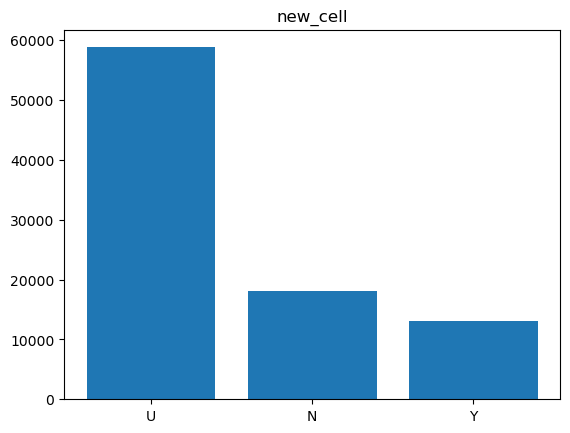

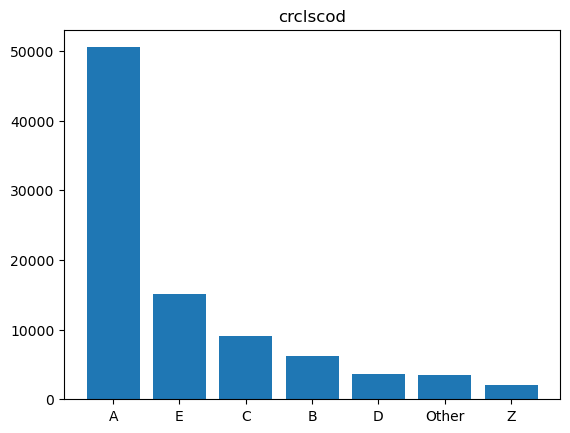

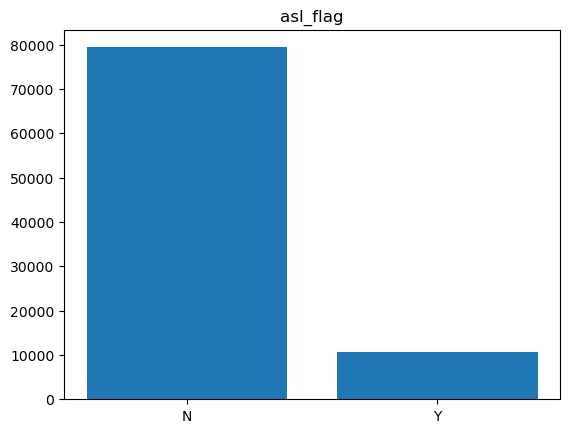

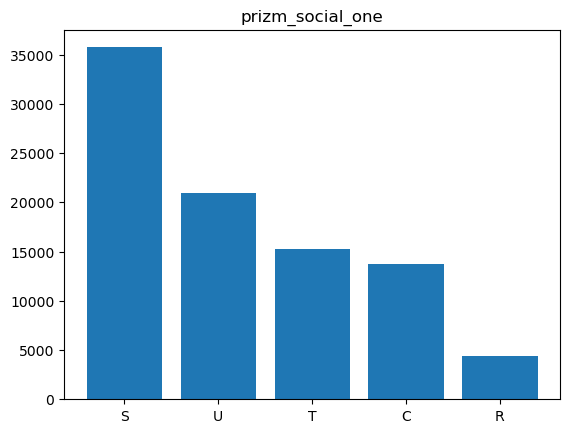

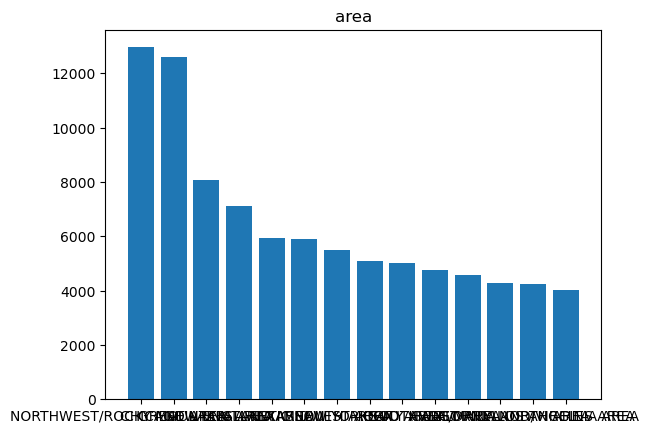

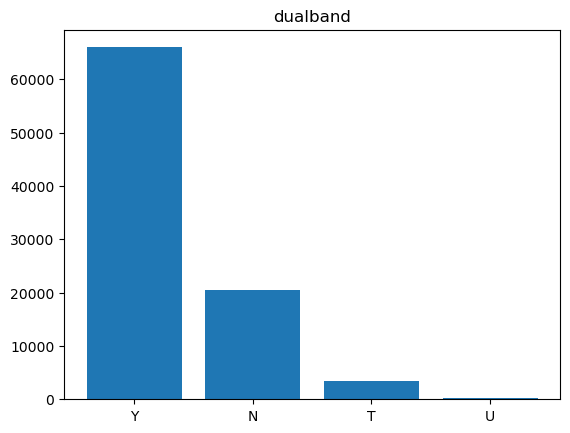

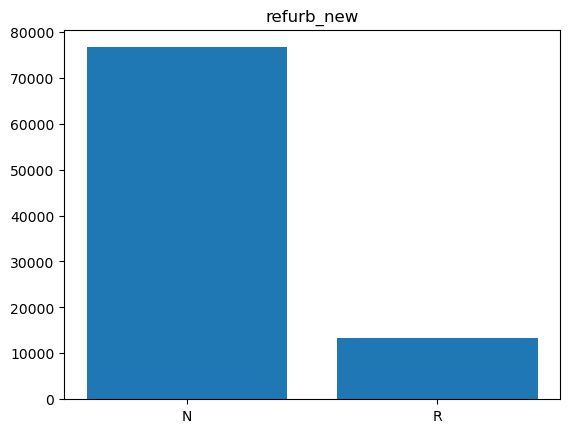

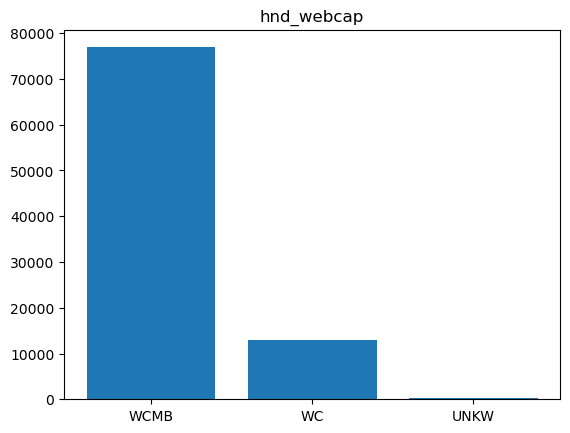

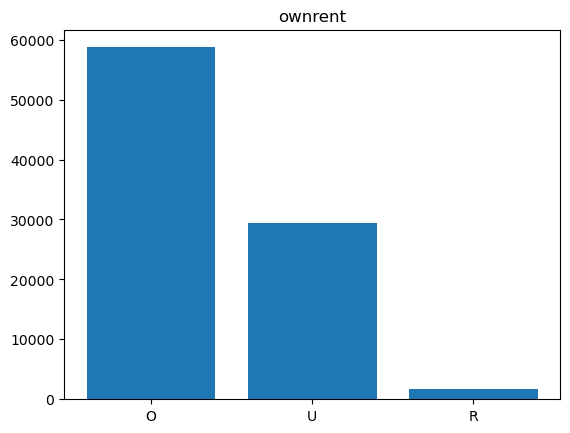

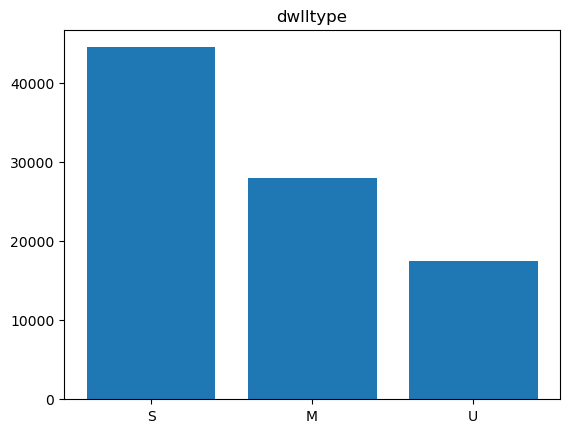

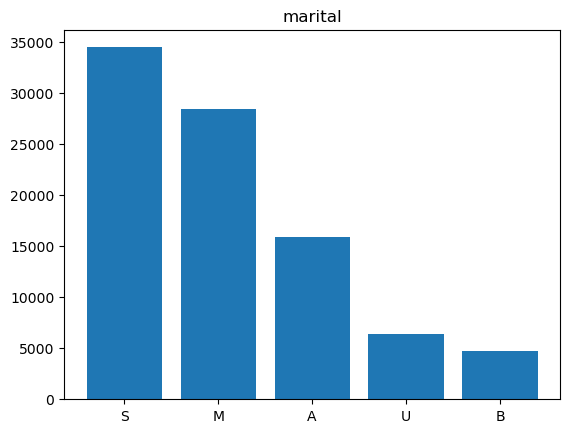

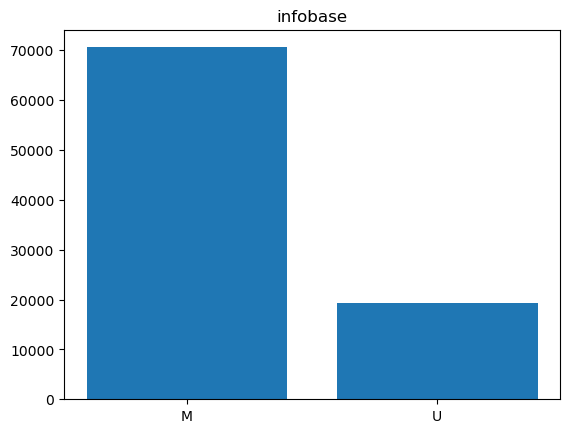

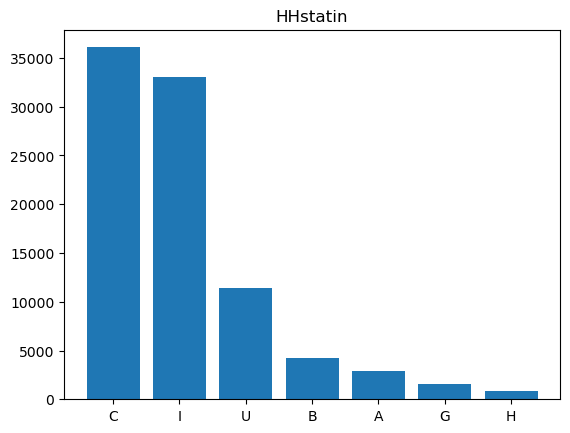

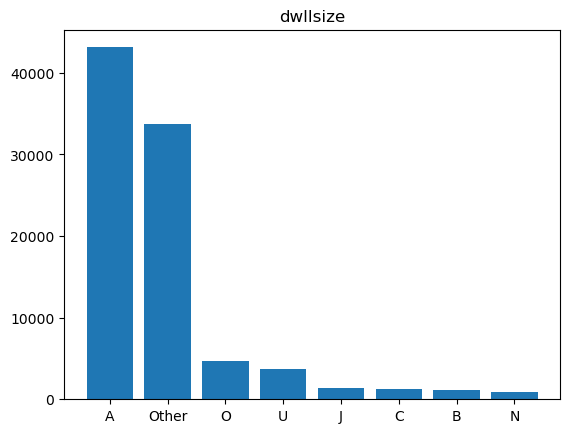

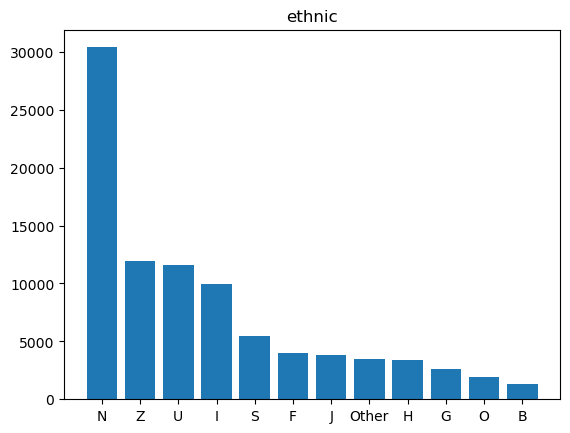

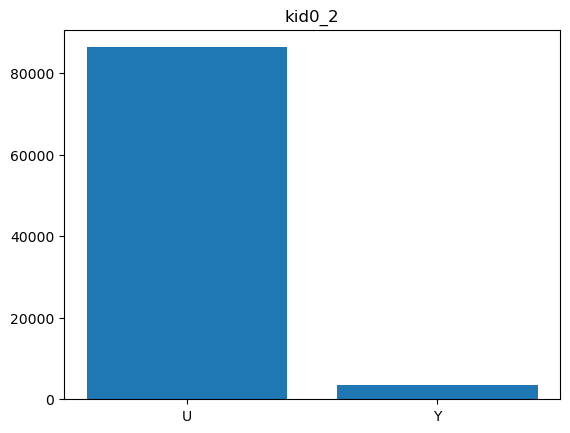

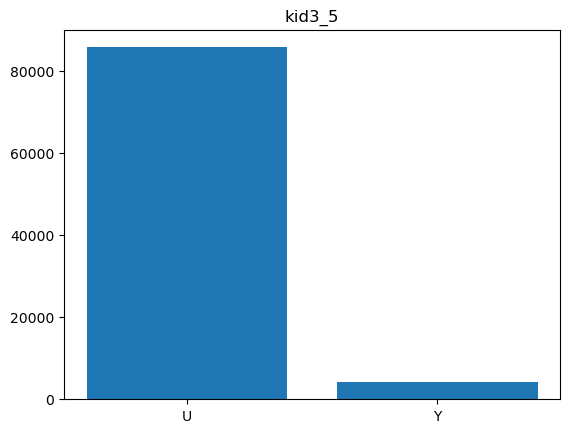

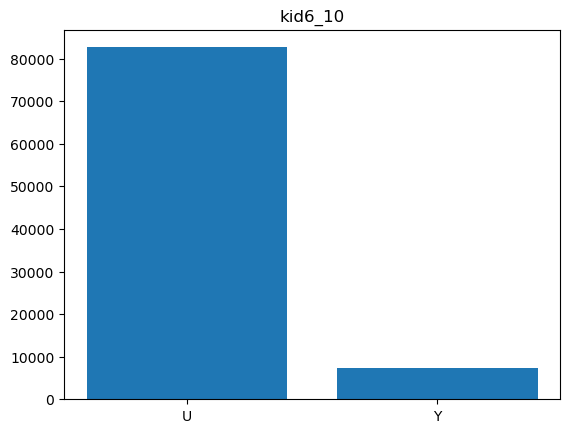

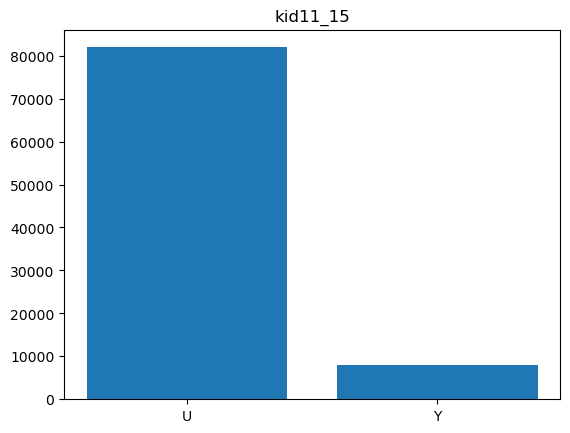

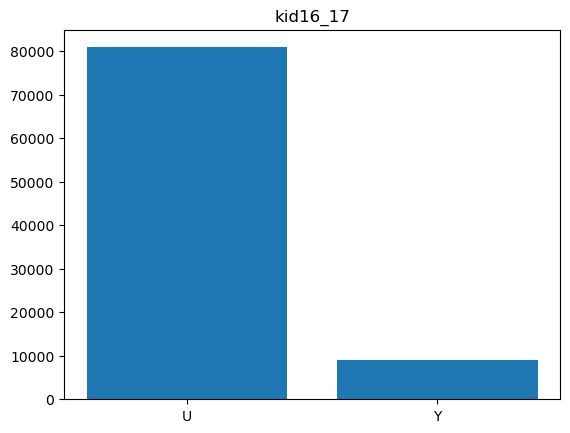

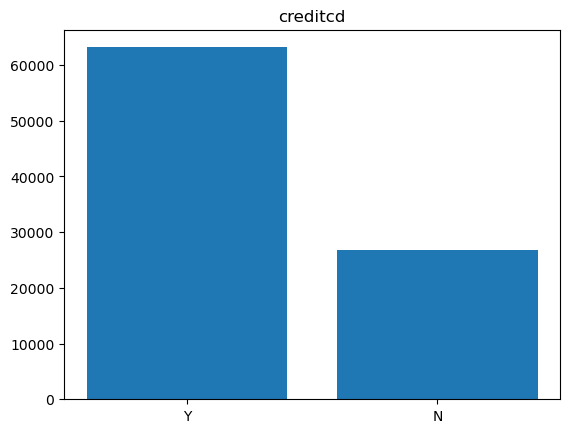

In [235]:
for i in l_cat:
    plt.bar(df2[i].unique(), df2[i].value_counts())
    plt.title(i)
    plt.show()

### Nulos en las Numericas

Analizamos las numericas

In [236]:
df3 = df2.copy()

L_num es la lista de las variables numericas sin nuestro target (uso features, todas las ciolumnas exepto el target, para sacarla en lugar que el df3)

In [237]:
l_num = list(df3[features].select_dtypes(include=['int64', 'float64']).columns)

In [238]:
len(l_num)

78

In [239]:
df3[l_num].describe()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89405.000000,89405.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,88593.000000,88593.000000,88593.000000,89296.000000,89999.000000,89999.000000,88549.000000,88549.000000,63498.000000,69967.000000,67804.000000,46432.000000,88549.000000,89999.000000,9.000000e+04
mean,58.312895,504.277946,45.880669,0.877813,40.798976,13.289932,13.046046,0.240786,1.308197,-13.786987,-1.074666,5.769639,0.037837,3.999448,0.019737,26.843561,0.027811,141.375341,0.805435,53.713298,0.047781,106.483091,0.720050,1.648754,4.344852,3.444618,28.909037,0.269522,221.363949,1.689888,109.071366,24.268663,27.785579,7.712004,17.676245,86.999369,0.334957,171.309285,0.654335,64.103954,0.385096,159.080481,1.035109,9.826661,142.180776,107.203141,0.010415,1.732817,19.263856,1.555067,1.366522,2970.669433,7874.976570,1065.717715,994.546384,7776.807032,2931.320344,57.288343,472.052308,170.568866,510.539844,178.227000,58.802889,501.598490,176.320082,58.266691,99.709575,1.802987,1.556184,0.197190,0.086867,6.180856,2.538197,5.809274,1.568896,0.059255,402.419438,1.045000e+06
std,46.084103,516.170057,23.370435,2.173665,96.970619,30.123282,29.719581,3.012631,15.374215,271.624916,50.565668,8.673272,0.885448,10.603489,0.699317,37.315217,0.501246,155.486573,8.455179,85.537833,2.176283,116.845898,7.679230,5.148484,12.141729,10.049161,54.960177,1.003104,257.220079,21.905864,160.081469,33.913196,47.948938,15.908932,40.382222,102.308064,3.890521,205.794020,7.335297,89.736523,4.393926,228.966797,16.988064,15.081650,156.468555,117.776670,0.465963,5.260407,9.149764,1.095305,0.661085,3887.921200,8869.646079,865.305299,851.715318,8802.189472,3855.692056,35.430616,425.257319,165.134394,524.737209,191.398108,46.476204,489.911616,181.593174,40.483529,60.788920,1.319121,0.900798,0.397879,0.281642,4.741242,1.452650,2.176928,0.628308,0.236103,252.821660,2.598091e+04
min,-5.862500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,23.750000,9.320000,0.000000,0.000000,2.910000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,9.989998,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.027500,148.500000,30.000000,0.000000,0.00000

In [240]:
l_num

['rev',
 'mou',
 'totmrc',
 'da',
 'ovrmou',
 'ovrrev',
 'vceovr',
 'datovr',
 'roam',
 'change_mou',
 'change_rev',
 'drop_vce',
 'drop_dat',
 'blck_vce',
 'blck_dat',
 'unan_vce',
 'unan_dat',
 'plcd_vce',
 'plcd_dat',
 'recv_vce',
 'recv_sms',
 'comp_vce',
 'comp_dat',
 'custcare',
 'ccrndmou',
 'cc_mou',
 'inonemin',
 'threeway',
 'mou_cvce',
 'mou_cdat',
 'mou_rvce',
 'owylis_vce',
 'mouowylisv',
 'iwylis_vce',
 'mouiwylisv',
 'peak_vce',
 'peak_dat',
 'mou_peav',
 'mou_pead',
 'opk_vce',
 'opk_dat',
 'mou_opkv',
 'mou_opkd',
 'drop_blk',
 'attempt',
 'complete',
 'callfwdv',
 'callwait',
 'months',
 'uniqsubs',
 'actvsubs',
 'totcalls',
 'totmou',
 'totrev',
 'adjrev',
 'adjmou',
 'adjqty',
 'avgrev',
 'avgmou',
 'avgqty',
 'avg3mou',
 'avg3qty',
 'avg3rev',
 'avg6mou',
 'avg6qty',
 'avg6rev',
 'hnd_price',
 'phones',
 'models',
 'truck',
 'rv',
 'lor',
 'adults',
 'income',
 'numbcars',
 'forgntvl',
 'eqpdays',
 'Customer_ID']

In [241]:
df3[l_num].head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,NaN,7.0,6.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,0.0,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,6.0,4.0,6.0,1.0,0.0,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,57,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,5.0,1.0,6.0,1.0,0.0,434.0,1000005


In [242]:
df3[l_num].isnull().sum()

rev              134
mou              134
totmrc           134
da               134
ovrmou           134
ovrrev           134
vceovr           134
datovr           134
roam             134
change_mou       595
change_rev       595
drop_vce           0
drop_dat           0
blck_vce           0
blck_dat           0
unan_vce           0
unan_dat           0
plcd_vce           0
plcd_dat           0
recv_vce           0
recv_sms           0
comp_vce           0
comp_dat           0
custcare           0
ccrndmou           0
cc_mou             0
inonemin           0
threeway           0
mou_cvce           0
mou_cdat           0
mou_rvce           0
owylis_vce         0
mouowylisv         0
iwylis_vce         0
mouiwylisv         0
peak_vce           0
peak_dat           0
mou_peav           0
mou_pead           0
opk_vce            0
opk_dat            0
mou_opkv           0
mou_opkd           0
drop_blk           0
attempt            0
complete           0
callfwdv           0
callwait     

array([[<AxesSubplot:title={'center':'rev'}>]], dtype=object)

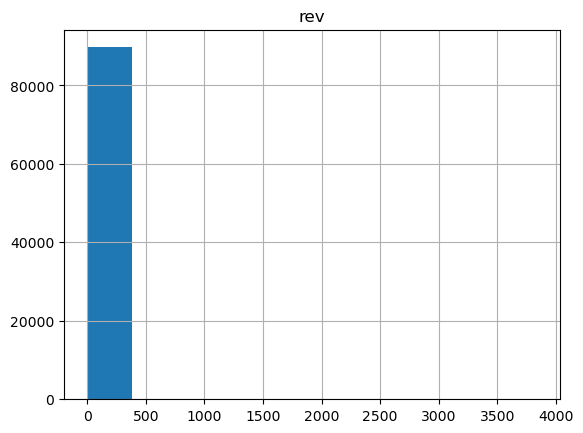

In [243]:
df3.hist('rev')

array([[<AxesSubplot:title={'center':'mou'}>]], dtype=object)

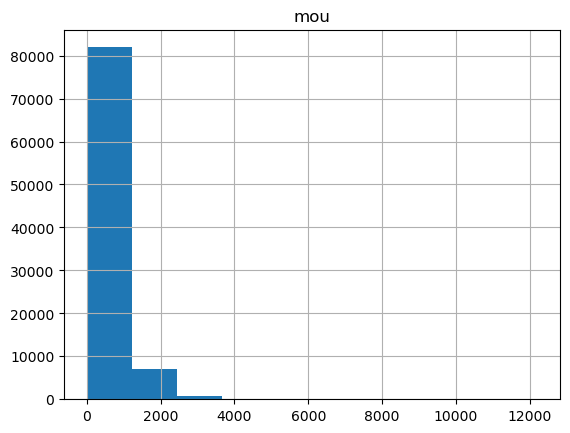

In [244]:
df3.hist('mou')

array([[<AxesSubplot:title={'center':'totmrc'}>]], dtype=object)

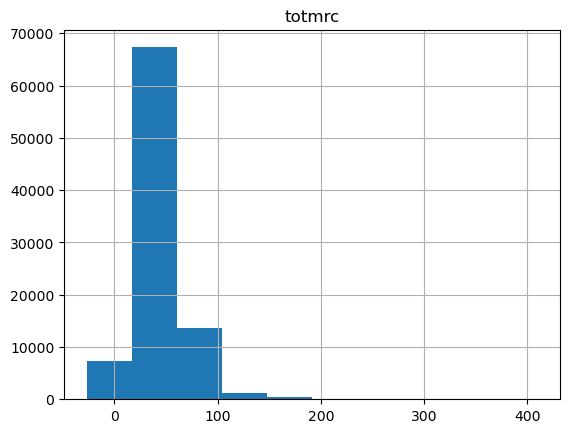

In [245]:
df3.hist('totmrc')

In [246]:
df3[l_num].isnull().sum()

rev              134
mou              134
totmrc           134
da               134
ovrmou           134
ovrrev           134
vceovr           134
datovr           134
roam             134
change_mou       595
change_rev       595
drop_vce           0
drop_dat           0
blck_vce           0
blck_dat           0
unan_vce           0
unan_dat           0
plcd_vce           0
plcd_dat           0
recv_vce           0
recv_sms           0
comp_vce           0
comp_dat           0
custcare           0
ccrndmou           0
cc_mou             0
inonemin           0
threeway           0
mou_cvce           0
mou_cdat           0
mou_rvce           0
owylis_vce         0
mouowylisv         0
iwylis_vce         0
mouiwylisv         0
peak_vce           0
peak_dat           0
mou_peav           0
mou_pead           0
opk_vce            0
opk_dat            0
mou_opkv           0
mou_opkd           0
drop_blk           0
attempt            0
complete           0
callfwdv           0
callwait     

Decido de remplacar nulos de las siguientes variables con su media. He hecho una comprobacion sample de las distribuciones antes y despues del imputacion de nulos y veo que las distribuciones no cambia. Asi que bien 

In [247]:
list_mean = ['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'lor', 'eqpdays']

for i in list_mean:
    df3[i] = np.where(df3[i].isnull(), df3[i].mean(), df3[i])

array([[<AxesSubplot:title={'center':'rev'}>]], dtype=object)

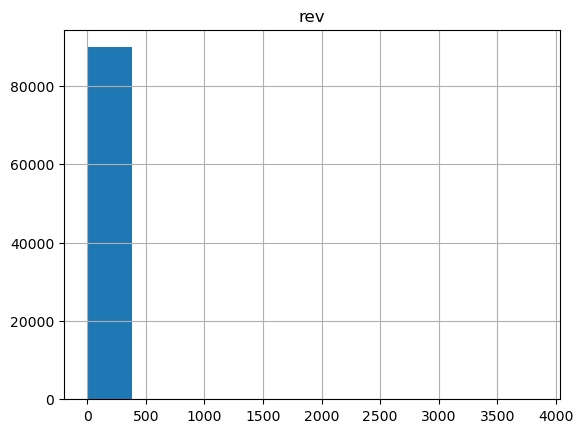

In [248]:
df3.hist('rev')

array([[<AxesSubplot:title={'center':'totmrc'}>]], dtype=object)

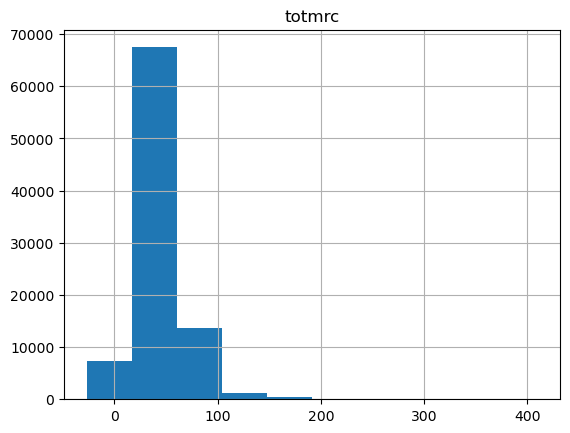

In [249]:
df3.hist('totmrc')

In [250]:
df3[l_num].isnull().sum()

rev                0
mou                0
totmrc             0
da                 0
ovrmou             0
ovrrev             0
vceovr             0
datovr             0
roam               0
change_mou         0
change_rev         0
drop_vce           0
drop_dat           0
blck_vce           0
blck_dat           0
unan_vce           0
unan_dat           0
plcd_vce           0
plcd_dat           0
recv_vce           0
recv_sms           0
comp_vce           0
comp_dat           0
custcare           0
ccrndmou           0
cc_mou             0
inonemin           0
threeway           0
mou_cvce           0
mou_cdat           0
mou_rvce           0
owylis_vce         0
mouowylisv         0
iwylis_vce         0
mouiwylisv         0
peak_vce           0
peak_dat           0
mou_peav           0
mou_pead           0
opk_vce            0
opk_dat            0
mou_opkv           0
mou_opkd           0
drop_blk           0
attempt            0
complete           0
callfwdv           0
callwait     

Para numeros de mhandset y modelos imputo la media pero con un round a int

In [251]:
list_p_and_m = ['phones', 'models']

for i in list_p_and_m:
    df3[i] = np.where(df3[i].isnull(), round(df3[i].mean(),0), df3[i])

In [252]:

round(df3['phones'].mean(),0)
round(df3['models'].mean(),0)

2.0

Variables donde decido de remblazar los nulos con la moda porque la media no tiene sentido en indicators o para el modelo del movil

In [253]:
list_mode = ['truck', 'rv', 'forgntvl', 'income']

for i in list_mode:
    df3[i] = np.where(df3[i].isnull(), df3[i].mode(), df3[i])

In [254]:
#Creo una variable que me indica si el cliente tiene el cargo mensual mas alto de la media

#df3['high_rev'] = df3['rev'] > df3['rev'].mean()


que columnas me puedo eliminar porque hay mucho nulos y no considero que afecte en la pred de nuestro modelo: 

adults,
numbcars,


In [255]:
df3.drop(columns=['adults', 'numbcars'], inplace=True)

In [256]:
df3.isnull().sum()

rev                 0
mou                 0
totmrc              0
da                  0
ovrmou              0
ovrrev              0
vceovr              0
datovr              0
roam                0
change_mou          0
change_rev          0
drop_vce            0
drop_dat            0
blck_vce            0
blck_dat            0
unan_vce            0
unan_dat            0
plcd_vce            0
plcd_dat            0
recv_vce            0
recv_sms            0
comp_vce            0
comp_dat            0
custcare            0
ccrndmou            0
cc_mou              0
inonemin            0
threeway            0
mou_cvce            0
mou_cdat            0
mou_rvce            0
owylis_vce          0
mouowylisv          0
iwylis_vce          0
mouiwylisv          0
peak_vce            0
peak_dat            0
mou_peav            0
mou_pead            0
opk_vce             0
opk_dat             0
mou_opkv            0
mou_opkd            0
drop_blk            0
attempt             0
complete  

Dataset sin nulos!

### Multivariate analysis

* si el tamaño del dataset lo permite (<20 variables)
* scatterplotmatrix(), heatmap's correlation, etc

Dataset con 100 columnas, usaré otros metodos para la analysis. Como por ejemplo la funcion mas abajo por la correlacion entre variables

### Eliminar columnas irrelevantes

Miro si hay alguna de las categoricas que puede ser convertida en booleana antes de hacer el one hot encoding. 
Hago un loop para sacarme los numeros de valores unicos y miro si por esas variables que tienen 2 tiene sentido que sea un booleano.
DEcido de transforma a boolean todas las que tienen 2

In [257]:
list_to_bool = []
for i in l_cat:
    print(i, len(df3[i].unique()))

#print(list_to_bool)





    #plt.bar(df2[i].unique(), df2[i].value_counts())
    #plt.title(i)
    #plt.show()

new_cell 3
crclscod 7
asl_flag 2
prizm_social_one 5
area 14
dualband 4
refurb_new 2
hnd_webcap 3
ownrent 3
dwlltype 3
marital 5
infobase 2
HHstatin 7
dwllsize 8
ethnic 12
kid0_2 2
kid3_5 2
kid6_10 2
kid11_15 2
kid16_17 2
creditcd 2


In [258]:
df3['asl_flag'] = df2['asl_flag']
df3['refurb_new'] = df2['refurb_new']
df3['kid0_2'] = df2['kid0_2']

In [259]:
df3['kid0_2'].value_counts()

U    86389
Y     3611
Name: kid0_2, dtype: int64

In [260]:
df3['infobase'] = df3['infobase'].map({'M' : True, 'U' : False})

In [261]:
df3['asl_flag'] = df3['asl_flag'].map({'Y' : True, 'N' : False})


In [262]:
df3['refurb_new'] = df3['refurb_new'].map({'N' : True, 'R' : False})

In [263]:
df3['kid0_2'] = df3['kid0_2'].map({'Y' : True, 'U' : False})

In [264]:


df3['kid3_5'] = df3['kid3_5'].map({'Y' : True, 'U' : False})
df3['kid6_10'] = df3['kid6_10'].map({'Y' : True, 'U' : False})
df3['kid11_15'] = df3['kid11_15'].map({'Y' : True, 'U' : False})
df3['kid16_17'] = df3['kid16_17'].map({'Y' : True, 'U' : False})
df3['creditcd'] = df3['creditcd'].map({'Y' : True, 'N' : False})

In [265]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 98 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               90000 non-null  float64
 2   totmrc            90000 non-null  float64
 3   da                90000 non-null  float64
 4   ovrmou            90000 non-null  float64
 5   ovrrev            90000 non-null  float64
 6   vceovr            90000 non-null  float64
 7   datovr            90000 non-null  float64
 8   roam              90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float6

## Encoding categories

* Si tienen escala, asignar valor numerico dentro de escala (ejemplo: "1-Bajo, 2-Medio, 3-Alto") (.replace)
* One Hot Encoding en resto de categoricos (pd.get_dummies())

In [266]:
l_cat = list(df3.select_dtypes(include='object').columns)

In [267]:
l_cat

['new_cell',
 'crclscod',
 'prizm_social_one',
 'area',
 'dualband',
 'hnd_webcap',
 'ownrent',
 'dwlltype',
 'marital',
 'HHstatin',
 'dwllsize',
 'ethnic']

In [268]:
for i in l_cat:
  print(i)
  print('Unique:',df3[i].nunique())
  print(df3[i].value_counts(),'\n')

new_cell
Unique: 3
U    58812
Y    18114
N    13074
Name: new_cell, dtype: int64 

crclscod
Unique: 7
A        50528
B        15055
C         9013
E         6257
D         3573
Z         3494
Other     2080
Name: crclscod, dtype: int64 

prizm_social_one
Unique: 5
S    35740
U    20935
C    15244
T    13705
R     4376
Name: prizm_social_one, dtype: int64 

area
Unique: 14
TEXAS                            12955
NEW YORK CITY AREA               12596
ATLANTIC SOUTH AREA               8080
FLORIDA                           7115
DC/MARYLAND/VIRGINIA AREA         5924
MIDWEST AREA                      5891
CALIFORNIA NORTH AREA             5476
NEW ENGLAND AREA                  5090
SOUTHWEST AREA                    5006
CHICAGO AREA                      4762
LOS ANGELES AREA                  4556
GREAT LAKES AREA                  4276
OHIO AREA                         4260
NORTHWEST/ROCKY MOUNTAIN AREA     4013
Name: area, dtype: int64 

dualband
Unique: 4
Y    65978
N    20418
T     3413


In [269]:
df3 = pd.get_dummies(df3, columns=l_cat)

In [270]:
df3.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,...,area_NEW YORK CITY AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_SOUTHWEST AREA,area_TEXAS,dualband_N,dualband_T,dualband_U,dualband_Y,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,ownrent_O,ownrent_R,ownrent_U,dwlltype_M,dwlltype_S,dwlltype_U,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_U,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_N,dwllsize_O,dwllsize_Other,dwllsize_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_Other,ethnic_S,ethnic_U,ethnic_Z
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,...,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,...,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,...,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Remove High-Correlation

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altmente correlacionada (>95% o >99%...) en el dataset (df)

In [271]:
def highly_correlated(df, target, threshold):
    col_corr = list()
    colnames = list()
    rownames = list()
    y = df[target]
    X = df[df.columns[df.columns != target]]
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
    
    return Z

In [272]:
highly_corr = highly_correlated(df3, 'churn', 0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,ovrrev,ovrmou,0.957401,0.021369,0.016317,ovrmou
1,vceovr,ovrmou,0.954806,0.021572,0.016317,ovrmou
2,vceovr,ovrrev,0.994997,0.021572,0.021369,ovrrev
3,comp_vce,plcd_vce,0.985686,0.050651,0.047029,plcd_vce
4,comp_dat,plcd_dat,0.990591,0.007206,0.007389,comp_dat
5,cc_mou,ccrndmou,0.988749,0.032771,0.034388,cc_mou
6,inonemin,recv_vce,0.965997,0.033247,0.040898,inonemin
7,mou_opkd,mou_cdat,0.960178,0.008218,0.008764,mou_opkd
8,attempt,plcd_vce,0.998551,0.047133,0.047029,plcd_vce
9,attempt,comp_vce,0.984313,0.047133,0.050651,attempt


In [273]:
df3.drop(columns=highly_corr['F_to_delete'], inplace=True)

In [274]:
df3.head()

,rev,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_dat,recv_vce,recv_sms,custcare,ccrndmou,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,drop_blk,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,asl_flag,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,...,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_SOUTHWEST AREA,area_TEXAS,dualband_N,dualband_T,dualband_U,dualband_Y,hnd_webcap_WC,ownrent_O,ownrent_R,dwlltype_M,dwlltype_S,dwlltype_U,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_U,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_N,dwllsize_O,dwllsize_Other,dwllsize_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_Other,ethnic_S,ethnic_U,ethnic_Z
0,23.9975,219.25,22.500,0.2475,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,0.0,42.333333,0.0,0.000000,0.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,1.333333,45.000000,0.0,0.333333,1,61,2,1,False,1453.44,4085.00,1602,29.66,83.37,32.69,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,57.4925,482.75,37.425,0.2475,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,0.0,69.000000,0.0,1.666667,6.333333,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,9.333333,193.333333,0.0,5.666667,0,56,1,1,False,2833.88,26367.00,14624,51.53,479.40,265.89,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,16.9900,10.25,16.990,0.0000,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.333333,6.000000,0.0,0.000000,1,58,1,1,False,1934.47,24303.05,7888,34.54,433.98,140.86,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,38.0000,7.50,38.000,0.0000,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.333333,0.0,0.000000,0.000000,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.000000,3.666667,0.0,0.000000,0,60,1,1,False,1941.81,3035.00,1479,40.45,63.23,30.81,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55.2300,570.50,71.980,0.0000,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,0.0,94.666667,0.0,8.666667,15.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,10.333333,137.000000,0.0,0.000000,0,57,1,1,False,2166.48,13965.00,4452,38.69,249.38,79.50,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Remove Low-Variance

* Eliminamos variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [275]:
from sklearn.feature_selection import VarianceThreshold

In [276]:

vt = VarianceThreshold(threshold = 0.01) #Eliminamos columnas donde el 99% de los valores son iguales
vt.fit(df3)

cols_lowvar = df3.columns[vt.get_support()==False]

df3.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

3  low variance features were removed:
 ['dualband_U', 'HHstatin_H', 'dwllsize_N']


In [277]:
df3.head()

,rev,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_dat,recv_vce,recv_sms,custcare,ccrndmou,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,drop_blk,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,asl_flag,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,...,area_DC/MARYLAND/VIRGINIA AREA,area_FLORIDA,area_GREAT LAKES AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_SOUTHWEST AREA,area_TEXAS,dualband_N,dualband_T,dualband_Y,hnd_webcap_WC,ownrent_O,ownrent_R,dwlltype_M,dwlltype_S,dwlltype_U,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_I,HHstatin_U,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,dwllsize_Other,dwllsize_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_Other,ethnic_S,ethnic_U,ethnic_Z
0,23.9975,219.25,22.500,0.2475,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,0.0,42.333333,0.0,0.000000,0.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,1.333333,45.000000,0.0,0.333333,1,61,2,1,False,1453.44,4085.00,1602,29.66,83.37,32.69,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,57.4925,482.75,37.425,0.2475,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,0.0,69.000000,0.0,1.666667,6.333333,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,9.333333,193.333333,0.0,5.666667,0,56,1,1,False,2833.88,26367.00,14624,51.53,479.40,265.89,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,16.9900,10.25,16.990,0.0000,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.333333,6.000000,0.0,0.000000,1,58,1,1,False,1934.47,24303.05,7888,34.54,433.98,140.86,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,38.0000,7.50,38.000,0.0000,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.333333,0.0,0.000000,0.000000,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.000000,3.666667,0.0,0.000000,0,60,1,1,False,1941.81,3035.00,1479,40.45,63.23,30.81,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55.2300,570.50,71.980,0.0000,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,0.0,94.666667,0.0,8.666667,15.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,10.333333,137.000000,0.0,0.000000,0,57,1,1,False,2166.48,13965.00,4452,38.69,249.38,79.50,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Save cleaned dataset

In [278]:
df3.to_csv('./data/clean_data.csv', index=False)